## Cut-offs

Plotting the Lennard-Jones potential across a very large distance will give something similar to that shown below. 

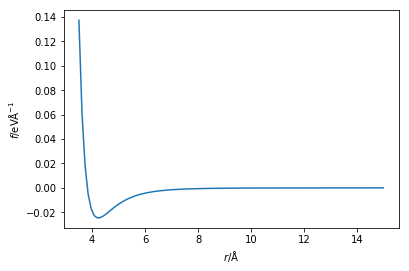

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def lj_force(r, epsilon, sigma):
    """
    Implementation of the Lennard-Jones potential 
    to calculate the force of the interaction.
    
    Parameters
    ----------
    r: float
        Distance between two particles (Å)
    epsilon: float 
        Potential energy at the equilibrium bond 
        length (eV)
    sigma: float 
        Distance at which the potential energy is 
        zero (Å)
    
    Returns
    -------
    float
        Force of the van der Waals interaction (eV/Å)
    """
    return 48 * epsilon * np.power(
        sigma / r, 13) - 24 * epsilon * np.power(
        sigma / r, 7)

r = np.linspace(3.5, 15, 100)
plt.plot(r, lj_force(r, 0.0103, 3.4))
plt.xlabel(r'$r$/Å')
plt.ylabel(r'$f$/eVÅ$^{-1}$')
plt.show()

It is clear that as the particles move further away from each other, the force between them **tends towards zero**. 
The concept of a cut-off suggests that if two particles are found to be very far apart, there is **no need** to calculate thh energy/force. 
Instead the value is simply taken as 0,

$$       f(r_{ij})=\left\{
  \begin{array}{@{}ll@{}}
    48\varepsilon\Bigg(\dfrac{\sigma^{12}}{r^{13}}\Bigg) - 24\varepsilon\Bigg(\dfrac{\sigma^{6}}{r^{7}}\Bigg), & \text{if}\ a<15\text{ Å} \\
    0, & \text{otherwise.}
  \end{array}\right.
$$

When there are periodic boundaries present (mentioned later), the cut-off ensures that the forces are not sampled incorrectly by having a cut-off of less than half of the cell size.  

This Python code below shows a modification of the Lennard-Jones potential that accounts for this cut-off.

In [5]:
cutoff = 15 

def lj_force_cutoff(r, epsilon, sigma):
    """
    Implementation of the Lennard-Jones potential 
    to calculate the force of the interaction which 
    is considerate of the cut-off.
    
    Parameters
    ----------
    r: float
        Distance between two particles (Å)
    epsilon: float 
        Potential energy at the equilibrium bond 
        length (eV)
    sigma: float 
        Distance at which the potential energy is 
        zero (Å)
    
    Returns
    -------
    float
        Force of the van der Waals interaction (eV/Å)
    """
    if r < cutoff:
        return 48 * epsilon * np.power(
            sigma / r, 13) - 24 * epsilon * np.power(
            sigma / r, 7)
    else:
        return 0